### STEPS -
- Create 3 folder in your desktop 
- Training, Testing, Validation
- Inside training create 2 folder as happy or not happy
- paste all the photo in testing part 

## Mood classfication using CNN (HAPPY / SAD)

In [75]:
pip install opencv-python


^C
Note: you may need to restart the kernel to use updated packages.


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [17]:
img = image.load_img(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Training\Happy\cute-little-boy-laugh.jpg')

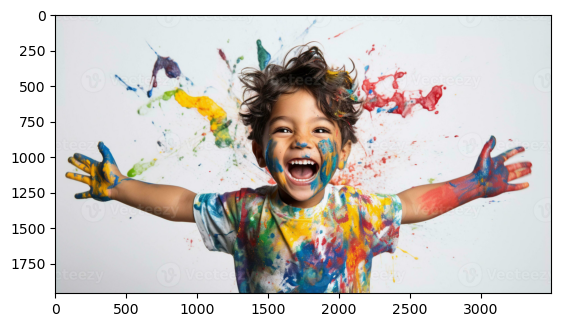

In [18]:
plt.imshow(img)

In [19]:
img1 = cv2.imread(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Training\Happy\cute-little-boy-laugh.jpg')

In [20]:
img1

array([[[222, 223, 219],
        [224, 225, 221],
        [222, 223, 219],
        ...,
        [231, 229, 221],
        [231, 229, 221],
        [231, 229, 221]],

       [[222, 223, 219],
        [224, 225, 221],
        [223, 224, 220],
        ...,
        [231, 229, 221],
        [231, 229, 221],
        [231, 229, 221]],

       [[222, 223, 219],
        [224, 225, 221],
        [223, 224, 220],
        ...,
        [231, 229, 221],
        [231, 229, 221],
        [231, 229, 221]],

       ...,

       [[192, 190, 190],
        [192, 190, 190],
        [192, 190, 190],
        ...,
        [221, 219, 211],
        [221, 219, 211],
        [220, 218, 210]],

       [[192, 190, 190],
        [192, 190, 190],
        [192, 190, 190],
        ...,
        [221, 219, 211],
        [221, 219, 211],
        [220, 218, 210]],

       [[192, 190, 190],
        [192, 190, 190],
        [192, 190, 190],
        ...,
        [221, 219, 211],
        [221, 219, 211],
        [220, 218, 210]]

In [21]:
img1.shape

(1960, 3497, 3)

In [22]:
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)

In [23]:

train_dataset = train.flow_from_directory(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validataion.flow_from_directory(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 19 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [24]:
#validation_dataset= validation.flow_from_directory(r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Validation',
#                                       target_size= (200,200),
#                                    batch_size=3, class_mode = 'binary')

In [25]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [26]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
train_dataset.class_mode

'binary'

In [28]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      17,334,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['acc'])

In [31]:
model_fit = model.fit(train_dataset, steps_per_epoch=3, epochs=10, validation_data = validation_dataset)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 678ms/step - acc: 0.6111 - loss: 0.5810 - val_acc: 0.7368 - val_loss: 0.5885
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - acc: 0.8036 - loss: 0.5251 - val_acc: 0.5263 - val_loss: 2.2344
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - acc: 0.0000e+00 - loss: 4.6586 - val_acc: 0.4737 - val_loss: 0.6063
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - acc: 0.5446 - loss: 0.5308 - val_acc: 0.6842 - val_loss: 0.6032
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - acc: 0.6528 - loss: 0.9012 - val_acc: 0.7368 - val_loss: 0.5148
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - acc: 0.3333 - loss: 0.6665 - val_acc: 1.0000 - val_loss: 0.4651
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - acc: 1.0000 - loss: 0.4423 - val_acc: 0.8421 - val_loss: 0.4349
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 979ms/step - acc: 0.7083 - loss: 0.4904 - val_acc: 0.8421 - val_loss: 0.3635
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - acc: 0.6667 - lo

In [32]:
dir_path = r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Testing'
for i in os.listdir(dir_path ):
    print(i)

28b82df7d2645b32bc58194a277ce93c.jpg
3537351272462eda3bc90ae89d8a0900.jpg
4906bb554cd2cc30f80812fe68d8f9f2.jpg
5a572b5237354e0be1b0cdd9c83da7e4.jpg
5c8e4bde4532f94b8f767f311774ec22.jpg
6658c21e19b3b4992bfccebf8f085ba1.jpg
814k0AQCuwL._SX679_.jpg
872368c972de3e91438b96ffc65c2143.jpg
b38820dc7110a8e6448d220718294889.jpg
baby.jpg
beautiful.jpg
cute-little-boy-laugh.jpg
depositphotos_194559450-stock-photo-group-islamic-women-looking-smartphone.jpg
f00dd87a4c435e0443d60030b9f21d5c.jpg
f03863a94172d56e9c8a1cd93ae25728.jpg
f3c9e41bee634e0f3120bd1bd8519752.jpg
funny-colorfully.jpg
group-mature-indigenous-latin-american-women-laughing_1009902-1061.jpg
istockphoto-671260158-612x612.jpg


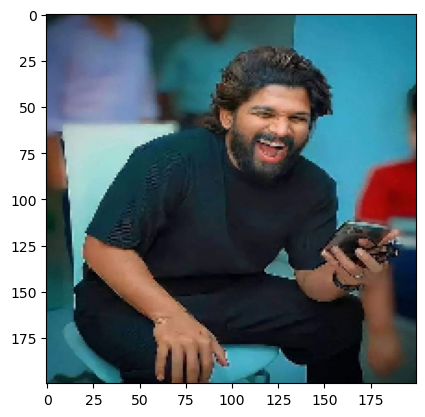

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
 i am  HAPPY


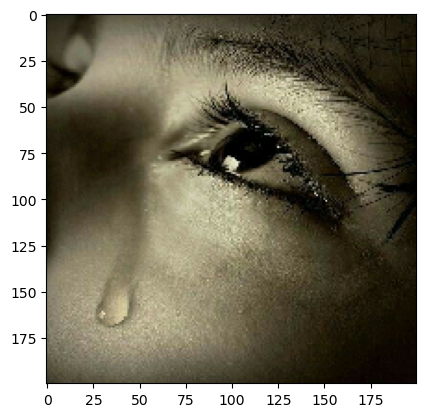

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i am SAD


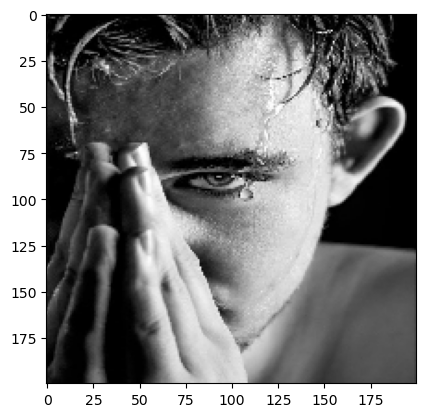

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i am SAD


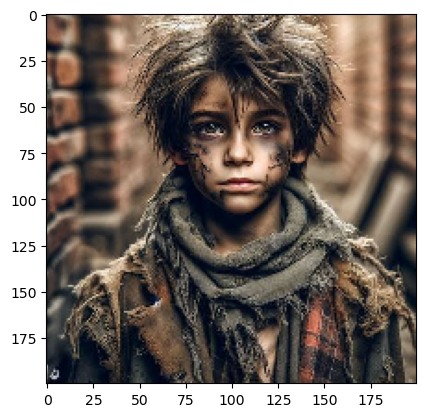

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am SAD


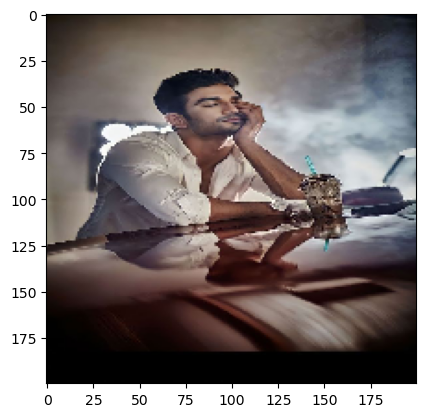

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
i am SAD


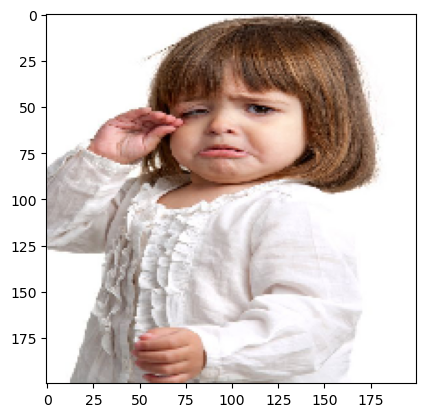

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i am SAD


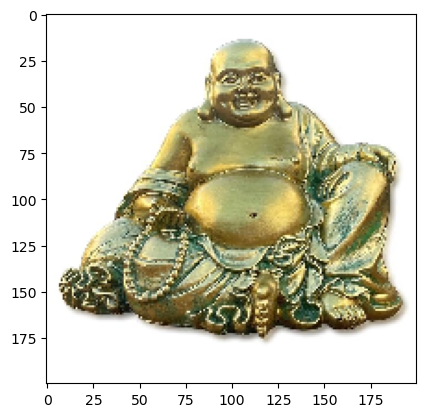

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 i am  HAPPY


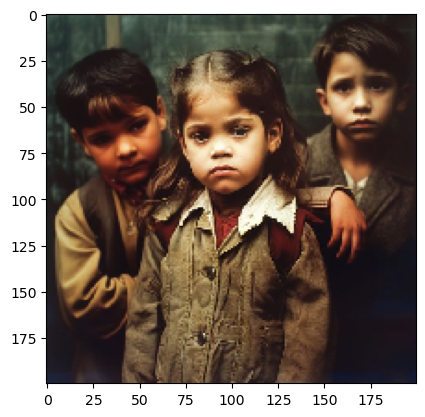

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i am SAD


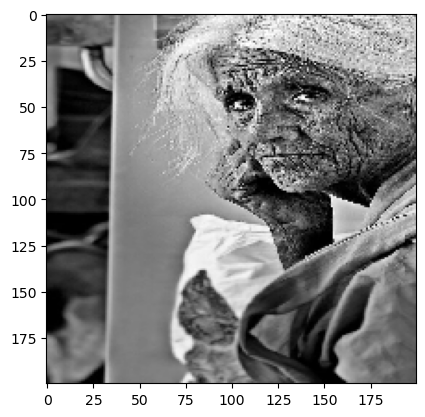

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
i am SAD


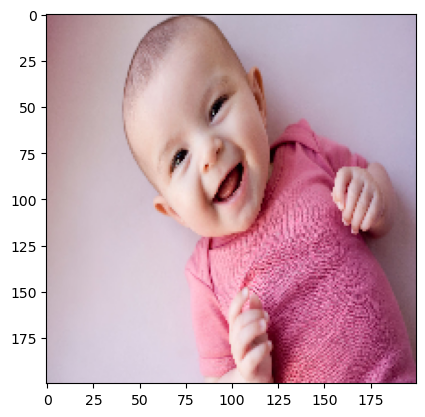

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
i am SAD


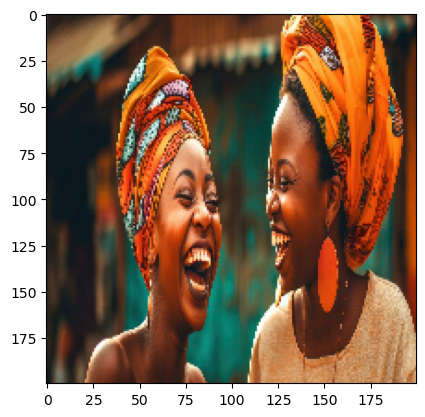

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 i am  HAPPY


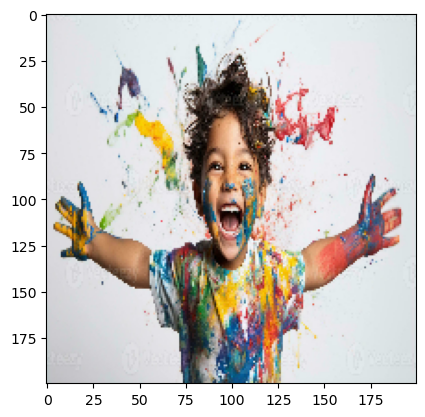

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 i am  HAPPY


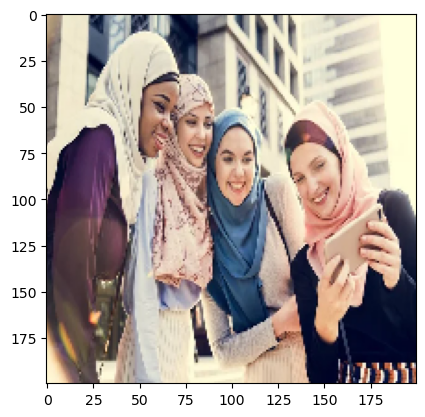

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
i am SAD


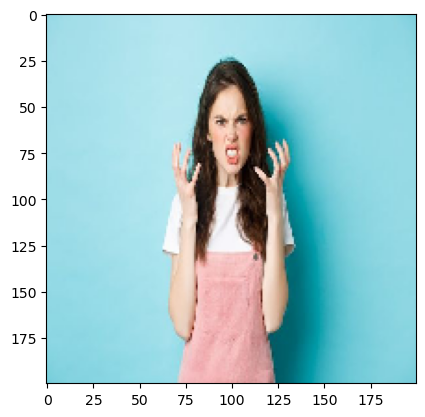

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i am SAD


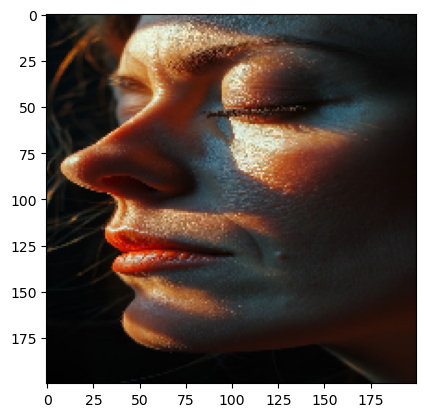

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
i am SAD


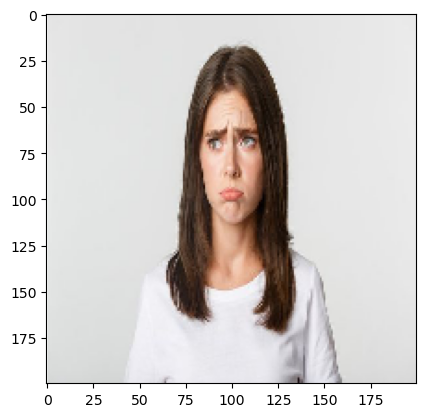

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
i am SAD


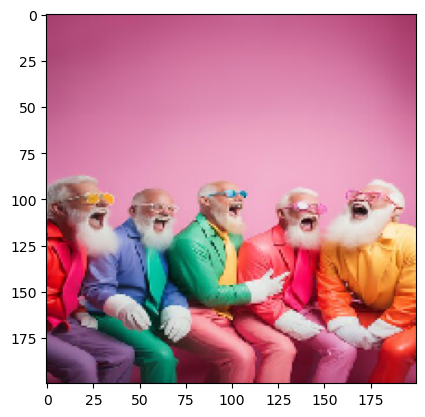

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 i am  HAPPY


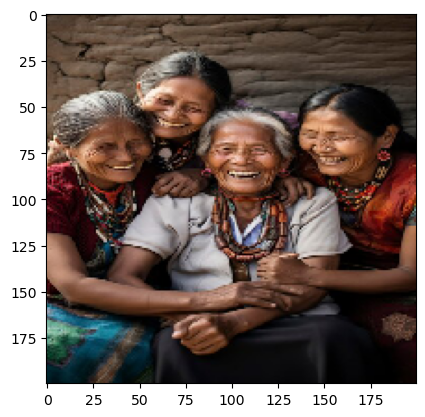

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
 i am  HAPPY


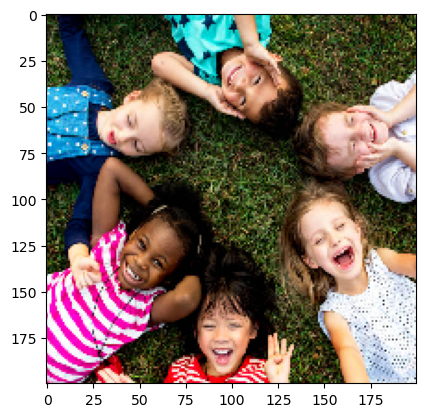

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 i am  HAPPY


In [33]:
dir_path = r'C:\Users\Neha\Downloads\NARESH IT DATA SCIENCE\IPYNP Folder\IMAGES\DATA_GEN\23 APR 24-Happy_Sad_Faces\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am  HAPPY')
    else:
        print('i am SAD')